In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=20
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['figure.facecolor']='yellow'

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df_columns=['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)']

In [7]:
df=df[df_columns].copy()

In [8]:
df.rename(columns={'Country':'country','Region':'region','Happiness Score':'happiness_score','Economy (GDP per Capita)':'economy','Family':'family','Health (Life Expectancy)':'health','Freedom':'freedom','Generosity':'generosity','Trust (Government Corruption)':'trust'},inplace=True)

In [9]:
df.head()

,country,region,happiness_score,economy,family,health,freedom,generosity,trust
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [10]:
df.isnull().sum()

country            0
region             0
happiness_score    0
economy            0
family             0
health             0
freedom            0
generosity         0
trust              0
dtype: int64

Text(0, 0.5, 'Economy (GDP per Capita)')

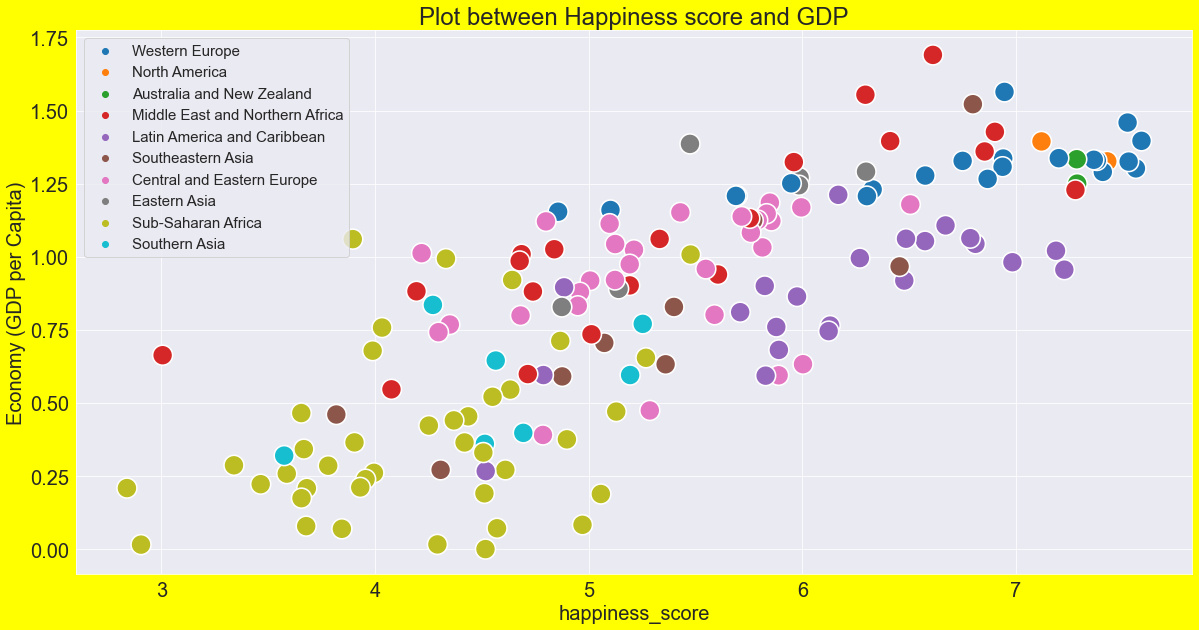

In [11]:
#plot b/w happiness and GDP

plt.rcParams['figure.figsize']=(20,10)
plt.title('Plot between Happiness score and GDP')
sns.scatterplot(x=df.happiness_score,y=df.economy,hue=df.region,s=400)

plt.legend(loc='upper left',fontsize='15')
plt.xlabel('happiness_score')
plt.ylabel('Economy (GDP per Capita)')


scatter plot shows different region have different happiness score according to their GDP growth.

In [12]:
gdp_region=df.groupby('region')['economy'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: economy, dtype: float64

Text(0, 0.5, '')

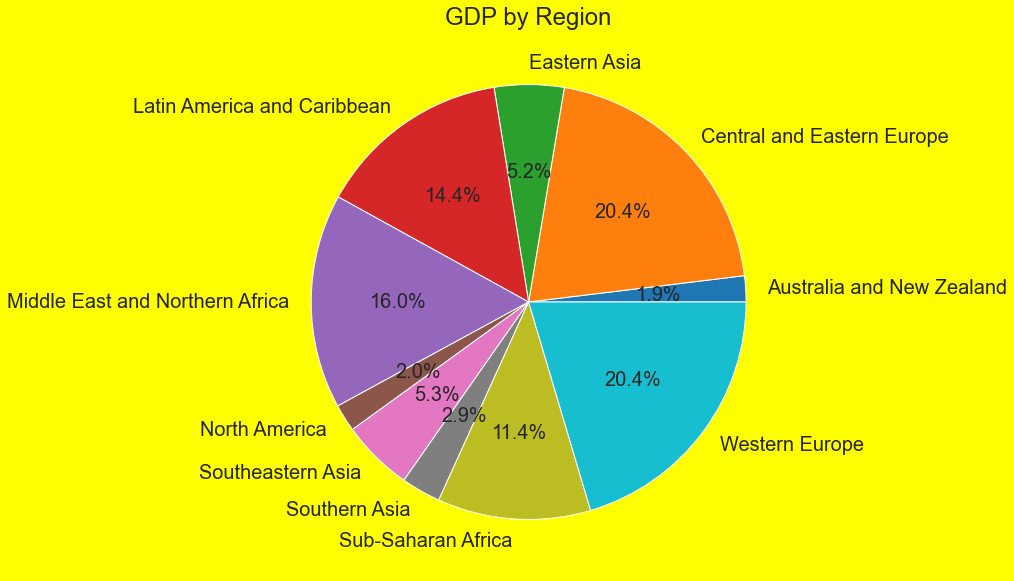

In [13]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

Bar plot shows Region wise GDP percentage

In [14]:
#total countries

total_countries=df.groupby('region')['country'].count()
print(total_countries)

region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: country, dtype: int64


<AxesSubplot:>

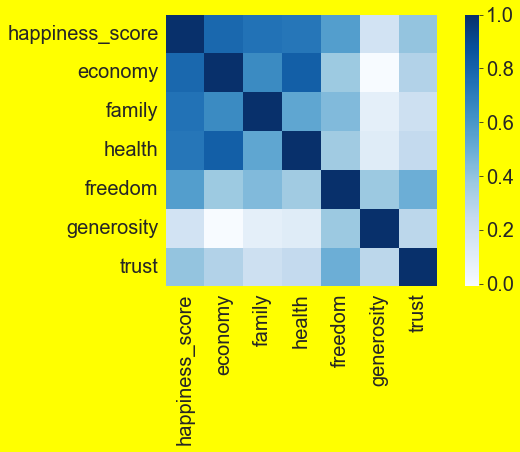

In [15]:
#correlation map

cor=df.corr(method='pearson')
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,ax=ax)

In [43]:
#corruption by region

corruption=df.groupby('region')[['trust']].mean()
corruption

,trust
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

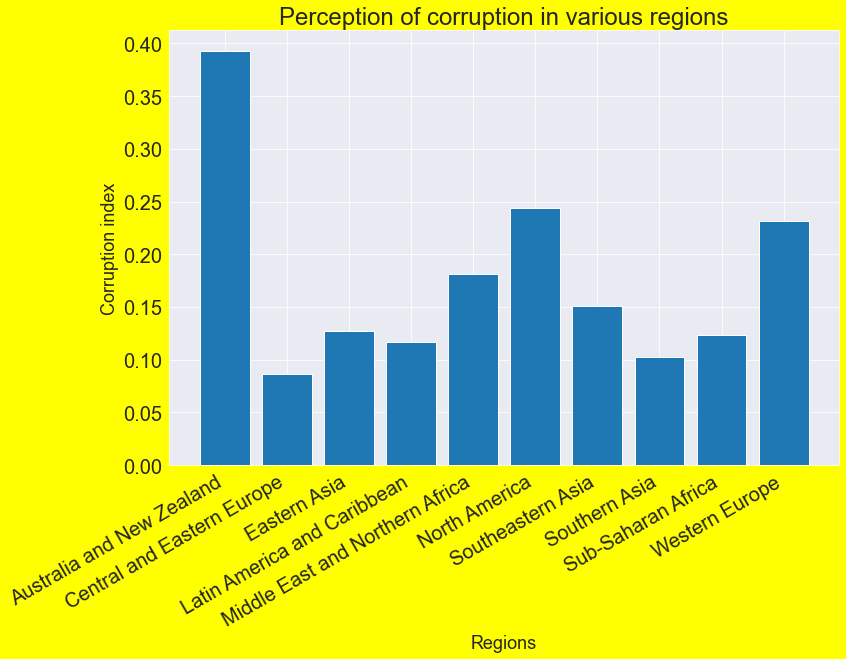

In [44]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of corruption in various regions')
plt.xlabel('Regions',fontsize=18)
plt.ylabel('Corruption index',fontsize=18)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index, corruption.trust)

Bar graph shows corruption index of different regions

In [21]:
top_10=df.head(10)
bottom_10=df.tail(10)

Text(592.1068181818181, 0.5, 'Life expectancy')

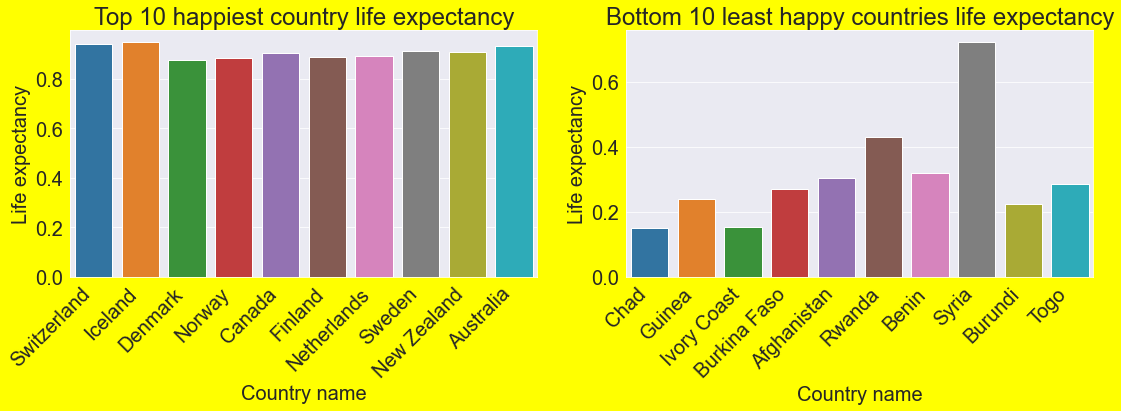

In [25]:
fig,axes=plt.subplots(1,2,figsize=(16,5))
plt.tight_layout(pad=2)
xlabels=top_10.country
axes[0].set_title('Top 10 happiest country life expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country,y=top_10.health,ax=axes[0])
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('Life expectancy')

xlabels=bottom_10.country
axes[1].set_title('Bottom 10 least happy countries life expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10.country,y=bottom_10.health,ax=axes[1])
axes[1].set_xlabel('Country name')
axes[1].set_ylabel('Life expectancy')

Text(0, 0.5, 'Happiness score')

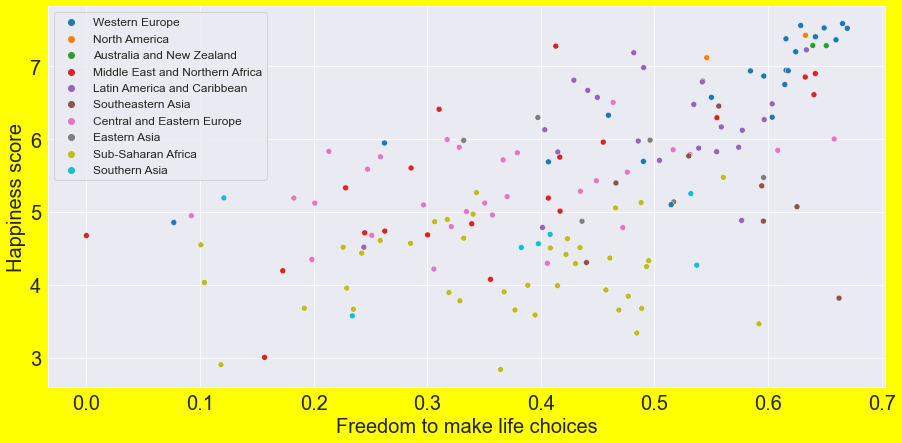

In [26]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=df.freedom,y=df.happiness_score,hue=df.region)
plt.legend(loc='upper left',fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness score')

<BarContainer object of 10 artists>

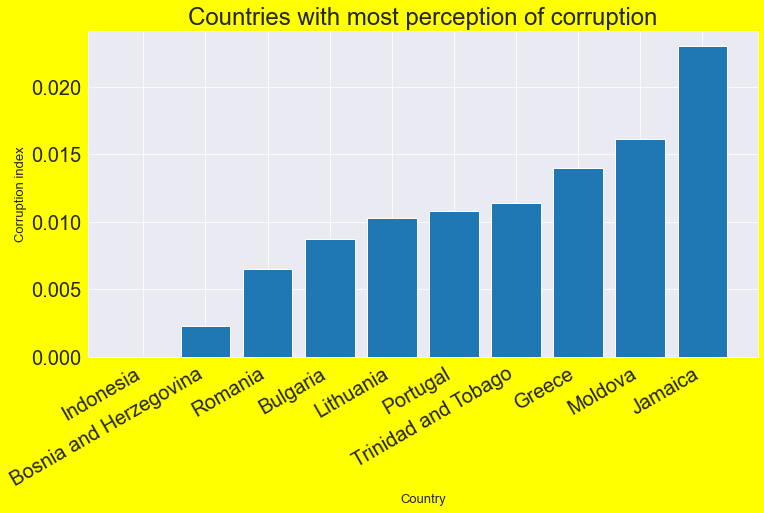

In [27]:
count=df.sort_values(by='trust').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with most perception of corruption')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(count.country,count.trust)

<BarContainer object of 10 artists>

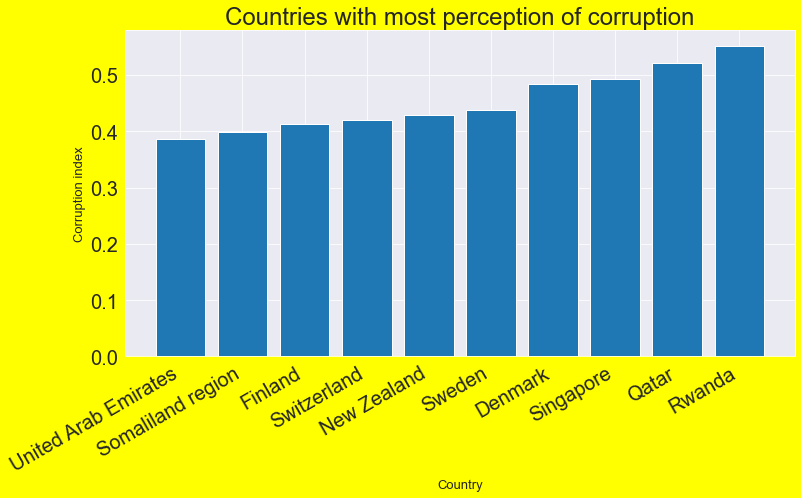

In [30]:
count=df.sort_values(by='trust').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with most perception of corruption')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(count.country,count.trust)

Text(0, 0.5, 'Corruption')

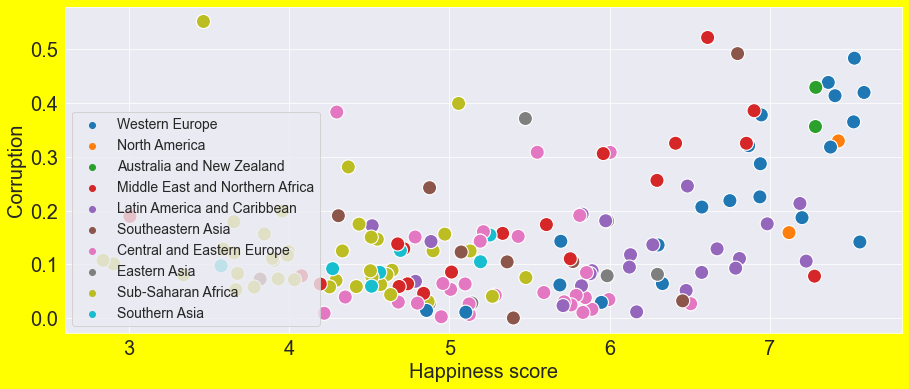

In [31]:
#corruption vs happiness

plt.rcParams['figure.figsize']=(15,6)
sns.scatterplot(x=df.happiness_score,y=df.trust,hue=df.region,s=200)
plt.legend(loc='lower left',fontsize='14')
plt.xlabel('Happiness score')
plt.ylabel('Corruption')